<a href="https://colab.research.google.com/github/DongdongKe/Leetcode/blob/main/sklearn_demo_hyperparameters_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## demo machine learning with sklearn tips and tricks part 1

- hyperparameters
- validation curve
- overfitting
- underfitting
- learning curve

### 1. generating a data set

For experimentation we generate a simple data set with two labels.

Labelling:
- label 0 if the data point is inside the circle with center and radius
- label 1 if the data point is outside the circle with center and radius

Randomizing:  
A certain degree of mixing is introduced by a parameter sigma.  
A larger sigma means more mixing. A sigma of 0 means no mixing.

In [3]:
import numpy as np

def generate_data_set(center, radius, sigma, nr_samples):
    sample_x, sample_y, sample_l = [], [], []
    for (x, y) in np.random.random_sample((nr_samples, 2)):
        xc, yc = center
        dist = np.sqrt((x - xc)**2 + (y - yc)**2) - radius
        label = 0 if sigma * np.random.randn() - dist > 0 else 1
        sample_x.append(x)
        sample_y.append(y)
        sample_l.append(label)
    return np.array([sample for sample in zip(sample_x, sample_y, sample_l)])
def plot_data_set(data_set):
    data_0 = data_set[data_set[:, 2] == 0]
    data_1 = data_set[data_set[:, 2] == 1]
    plt.plot(data_0[:, 0], data_0[:, 1], 'ro', markersize=2)
    plt.plot(data_1[:, 0], data_1[:, 1], 'bo', markersize=2)

Some helper functions for plotting data sets and model training:

In [4]:
import matplotlib
import matplotlib.pyplot as plt

def plot_optimal_decision_surface(center, radius, no_points=500):
    xc, yc = center
    xx, yy = [], []
    for n in range(no_points):
        theta = 2 * np.pi * n / no_points
        x = xc + radius * np.cos(theta)
        y = yc + radius * np.sin(theta)
        if 0.0 < x < 1.0 and 0.0 < y < 1.0:
            xx.append(x)
            yy.append(y)
    plt.plot(xx, yy, 'k-')
    
def plot_data_and_model(clf, data_set, center, radius):
    # create a mesh to color the areas of label 0/1
    xx, yy = np.meshgrid(np.arange(0.0, 1.005, 0.005),  # min_x, max_x, mesh_size 
                         np.arange(0.0, 1.005, 0.005))  # min_y, max_y, mesh_size

    Z = 1 - clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plot_data_set(data_set)
    plot_optimal_decision_surface(center, radius)
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.0)

    plt.xlabel("feature 'X'")
    plt.ylabel("feature 'Y'")

def features_and_labels_to_dataset(features, labels):
    # combine features and labels so we can plot them
    data_set = np.array([(xy[0], xy[1], z) for (xy, z) in zip(features, labels)])
    return data_set

In [5]:
# example data set with small circle and no mixing 
center_1 = (0.5, 0.5)
radius_1 = 0.4
sigma_1 = 0.0
nr_samples = 5000
data_set_1 = generate_data_set(center_1, radius_1, sigma_1, nr_samples)

# example data set with large circle and mixing 
center_2 = (0.5, -0.1)
radius_2 = 0.7
sigma_2 = 0.1

data_set_2 = generate_data_set(center_2, radius_2, sigma_2, nr_samples)

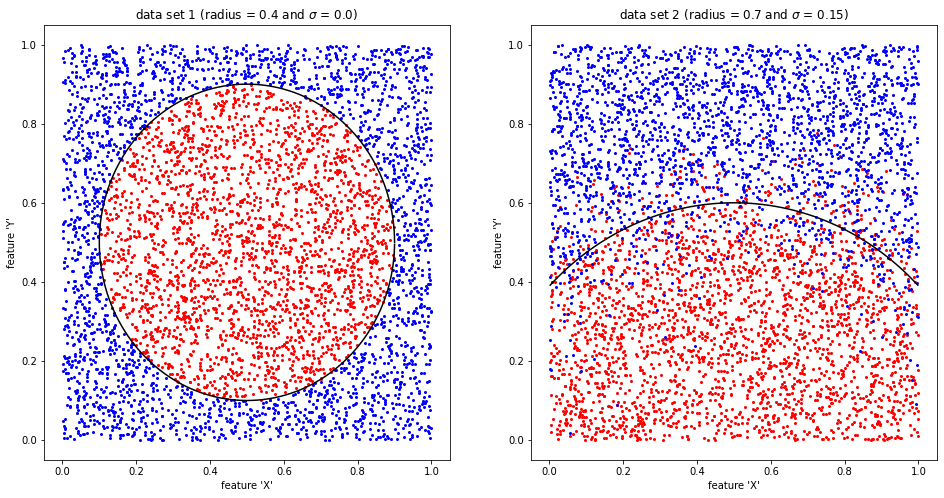

In [6]:
# plot the data sets side by side
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)

plt.subplot(1, 2, 1)
plt.title('data set 1 (radius = 0.4 and $\sigma$ = 0.0)')
plt.xlabel("feature 'X'")
plt.ylabel("feature 'Y'")
plot_data_set(data_set_1)
plot_optimal_decision_surface(center_1, radius_1)

plt.subplot(1, 2, 2)
plt.title('data set 2 (radius = 0.7 and $\sigma$ = 0.15)')
plt.xlabel("feature 'X'")
plt.ylabel("feature 'Y'")
plot_data_set(data_set_2)
plot_optimal_decision_surface(center_2, radius_2)
plt.show()

### 2. preparing a data set, training a model and calculating the accuracy of the trained model

In [22]:
# prepare a data set for classification with the decision tree algorithm
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd


center=(0.5, -0.1)
radius=0.7
sigma=0.15
nr_samples=5000
data_set = pd.read_excel (r'C:\Users\KeDon\Downloads\dataset\2. final\datasets\eda\wesad\combined\classification\wesad-chest-combined-classification-eda.csv')
X = data_set[:, :, :] # features are in all columns but the last
y = data_set[:, -1]  # labels are in the last column of dataset

# create a training and a test set
# test_size = 0.2 causes the training set to be 80% and the test set to be 20% of all samples in data_set
# pseudo random seed 42 (random_state = 0 )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

SyntaxError: ignored

In [8]:
# Train a support vector machine algorithm in the training set and compare the accuracy on the trainnig set and the test set
from sklearn.svm import SVC
clf = SVC(C=1, gamma=1E5)
clf = clf.fit(X_train, y_train)

In [9]:
# compare the accuracy of the trained model on the training set with the accuracy on the test set
from sklearn.metrics import accuracy_score
y_predict_train = clf.predict(X_train)
y_predict_test = clf.predict(X_test)
accuracy_train = accuracy_score(y_train, y_predict_train)
accuracy_test = accuracy_score(y_test, y_predict_test)
print('accuracy of the model on the train/test sets:', accuracy_train, accuracy_test)

accuracy of the model on the train/test sets: 0.9985 0.615


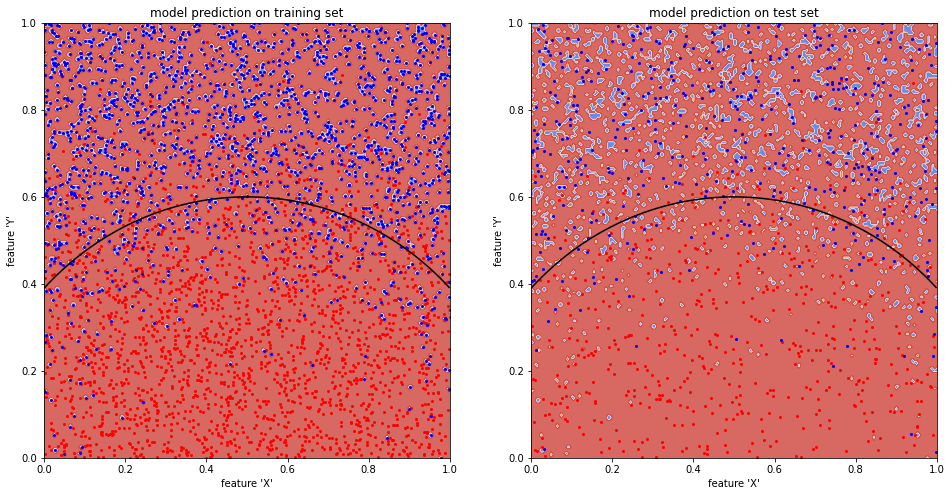

In [10]:
# plot the prediction of the trained model on the training set and the test set
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
training_set = features_and_labels_to_dataset(X_train, y_train)
test_set = features_and_labels_to_dataset(X_test, y_test)
plt.subplot(1, 2, 1)
plt.title('model prediction on training set')
plot_data_and_model(clf, training_set, center, radius)
plt.subplot(1, 2, 2)
plt.title('model prediction on test set')
plot_data_and_model(clf, test_set, center, radius)
plt.show()

As you can see the prediction accuracy of the model on the training set is significantly higher than the prediction accuracy on the test set.  

This is often an indication of 'overfitting', and the plot shows that individual points are modelled rather that areas, confirming that the model is overfitted.

Overfitting means that the model has not been trained as well as it could be.

In the rest of this notebook we will look into methods on how to know/show what is the optimal training of a model.

### hyper parameters

In machine learning algorithms you can improve the training of a model by setting certain so-called hyperparameters.

For example, in the Support Vector Machine algorithm, the main hyperparameters are:  
- gamma: the parameter that determines how many samples around the decision surfaces contribute to the model (these samples are also known as the 'support vectors').  
  
- C: the parameter that determines the allowed 'flexibility/waviness' of the decision surface.  

(for more information see: https://scikit-learn.org/stable/modules/svm.html#svm)  

### validation curves

Let's see the effect of varying gamma on the training of a SVM model.  

Such curves are called validation curves.

In [11]:
def train_validate(clf, X_train, y_train, X_test, y_test):
    clf = clf.fit(X_train, y_train)
    y_predict_train = clf.predict(X_train)
    y_predict_test = clf.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_predict_train)
    accuracy_test = accuracy_score(y_test, y_predict_test)
    return accuracy_train, accuracy_test

In [12]:
from sklearn.svm import SVC

accuracies_train = []
accuracies_test = []
clf = SVC()
gamma_values = np.logspace(-5, 5, 20)
for gamma in gamma_values:
    clf.gamma = gamma
    a_trn, a_tst = train_validate(clf, X_train, y_train, X_test, y_test)
    accuracies_train.append(a_trn)
    accuracies_test.append(a_tst)
print(gamma_values)
print(accuracies_train)
print(accuracies_test)

[1.00000000e-05 3.35981829e-05 1.12883789e-04 3.79269019e-04
 1.27427499e-03 4.28133240e-03 1.43844989e-02 4.83293024e-02
 1.62377674e-01 5.45559478e-01 1.83298071e+00 6.15848211e+00
 2.06913808e+01 6.95192796e+01 2.33572147e+02 7.84759970e+02
 2.63665090e+03 8.85866790e+03 2.97635144e+04 1.00000000e+05]
[0.5305, 0.5305, 0.5305, 0.5305, 0.84925, 0.85975, 0.8595, 0.859, 0.858, 0.8595, 0.85925, 0.85675, 0.8605, 0.862, 0.86825, 0.87625, 0.91, 0.9625, 0.99275, 0.9985]
[0.535, 0.535, 0.535, 0.535, 0.854, 0.857, 0.856, 0.858, 0.867, 0.87, 0.87, 0.872, 0.871, 0.869, 0.873, 0.87, 0.848, 0.827, 0.717, 0.615]


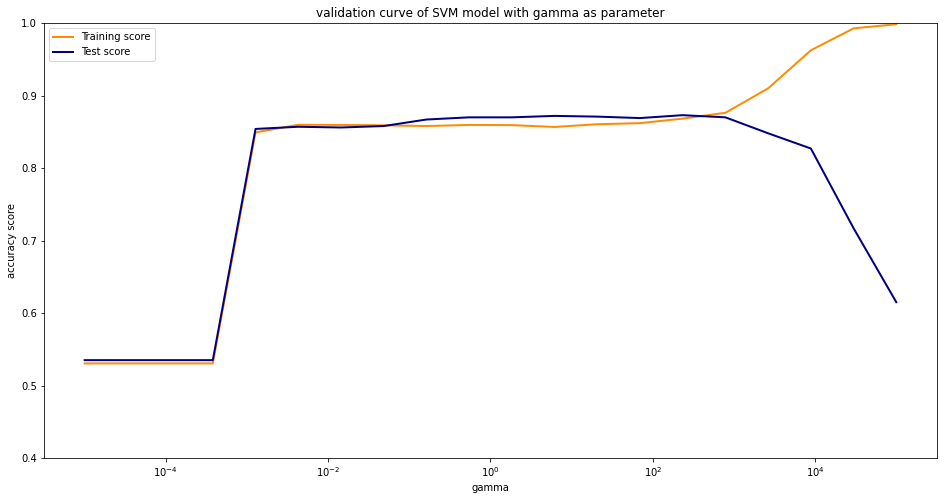

In [13]:
plt.title("validation curve of SVM model with gamma as parameter")
plt.xlabel("gamma")
plt.ylabel("accuracy score")
plt.ylim(0.4, 1.0)
line_width = 2
plt.semilogx(gamma_values, accuracies_train, label="Training score", color="darkorange", lw=line_width)
plt.semilogx(gamma_values, accuracies_test, label="Test score", color="navy", lw=line_width)
plt.legend(loc="best")
plt.show()

### Underfitting and Overfitting

From the plot above it is clear that there are roughly three situations:

1. $gamma < 10^{-3}$:  
The accuracy of the model prediction on the training set and the test set and are both bad (around 0.5).  
With only two labels this means that the model is not predicting at all (just as well as a random coin flip).  
This situation is called **'underfitting'**.
  

2. $10^{-3} < gamma < 10^{1}$:  
The accuracy of the model prediction on the training set and the test set and are both around 0.85.  
This means that the model can predict significantly better than a coin flip, on data that it has not been trained for. 
  

3. $10^{1} < gamma$:  
The accuracy of the model prediction on the training set is significantly higher than that of the the test set.  
This means that the model predicts very well for data that it has been trained for, but very badly on data that it has not been trained for.  
This situation is called **'overfitting'**.


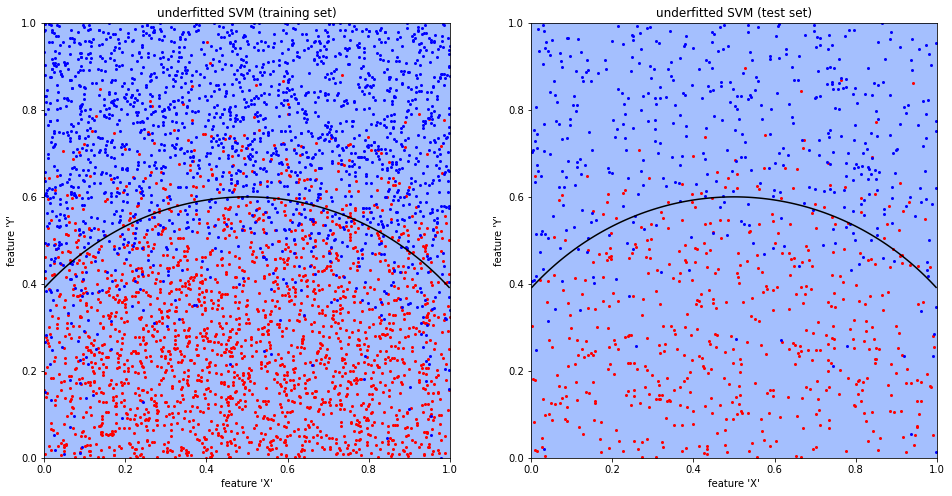

In [14]:
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)

clf_underfitted = SVC(gamma=1E-4)
train_validate(clf_underfitted, X_train, y_train, X_test, y_test)

training_set = features_and_labels_to_dataset(X_train, y_train)
test_set = features_and_labels_to_dataset(X_test, y_test)

plt.subplot(1, 2, 1)
plot_data_and_model(clf_underfitted, training_set, center, radius)
plt.title('underfitted SVM (training set)')
plt.subplot(1, 2, 2)
plot_data_and_model(clf_underfitted, test_set, center, radius)
plt.title('underfitted SVM (test set)')
plt.show()

Plot of a properly fitted model

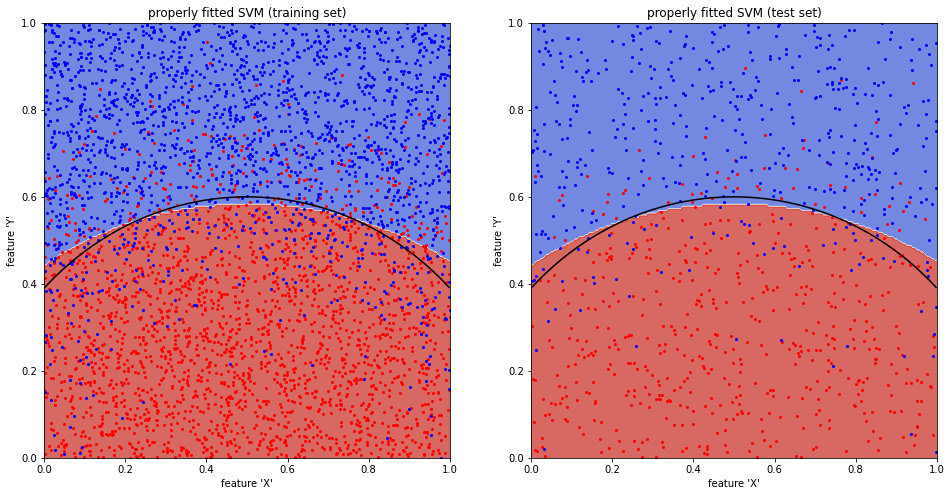

In [15]:
clf = SVC(gamma=1E0)
train_validate(clf, X_train, y_train, X_test, y_test)

plt.subplot(1, 2, 1)
plot_data_and_model(clf, training_set, center, radius)
plt.title('properly fitted SVM (training set)')
plt.subplot(1, 2, 2)
plot_data_and_model(clf, test_set, center, radius)
plt.title('properly fitted SVM (test set)')
plt.show()

Plot of an overfitted model.

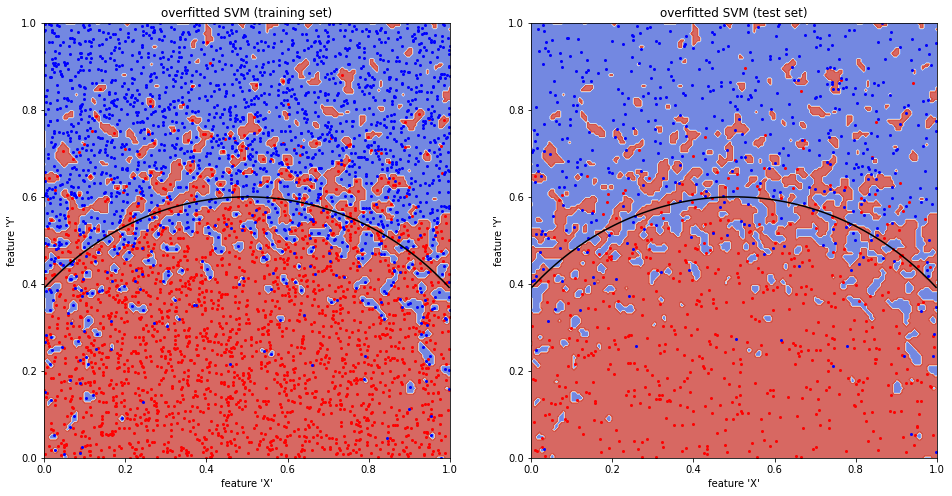

In [16]:
clf_overfitted = SVC(gamma=1E4)
train_validate(clf_overfitted, X_train, y_train, X_test, y_test)

plt.subplot(1, 2, 1)
plot_data_and_model(clf_overfitted, training_set, center, radius)
plt.title('overfitted SVM (training set)')
plt.subplot(1, 2, 2)
plot_data_and_model(clf_overfitted, test_set, center, radius)
plt.title('overfitted SVM (test set)')
plt.show()

### validation_curve

The type of analysis above (varying values of a hyperparameter) is applied so often that sklearn has a special method for it: validation_curve.  
(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve)  
Using this method code trining for a range of values is simplified to the following (please note that it also combines K-fold validation with default 5 folds):

In [17]:
from sklearn.model_selection import validation_curve
param_range = np.logspace(-5, 5, 10)
accuracies_train, accuracies_test = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range, scoring="accuracy", n_jobs=5)
print(accuracies_train)
print(accuracies_test)

[[0.53125 0.53125 0.5315  0.5315  0.5315 ]
 [0.53125 0.53125 0.5315  0.5315  0.5315 ]
 [0.8595  0.85925 0.855   0.861   0.85775]
 [0.86075 0.859   0.855   0.85925 0.8585 ]
 [0.86225 0.8635  0.85725 0.86125 0.8615 ]
 [0.8635  0.86275 0.85775 0.86125 0.862  ]
 [0.864   0.865   0.86175 0.863   0.864  ]
 [0.879   0.8795  0.87225 0.875   0.877  ]
 [0.959   0.95275 0.956   0.95725 0.95975]
 [0.99925 0.99875 0.99875 0.99825 0.99875]]
[[0.532 0.532 0.531 0.531 0.531]
 [0.532 0.532 0.531 0.531 0.531]
 [0.851 0.853 0.875 0.854 0.859]
 [0.853 0.852 0.876 0.851 0.857]
 [0.859 0.852 0.878 0.857 0.854]
 [0.854 0.856 0.879 0.858 0.857]
 [0.859 0.851 0.87  0.86  0.856]
 [0.852 0.844 0.877 0.864 0.853]
 [0.815 0.827 0.825 0.827 0.809]
 [0.605 0.597 0.6   0.608 0.601]]


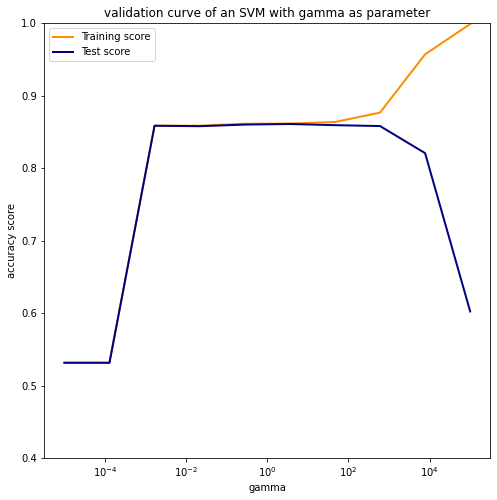

In [18]:
# plotting the result from validation_curve
# average the scores for the 5 folds and plot the result
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
train_scores_mean = np.mean(accuracies_train, axis=1)
test_scores_mean = np.mean(accuracies_test, axis=1)
plt.title("validation curve of an SVM with gamma as parameter")
plt.xlabel("gamma")
plt.ylabel("accuracy score")
plt.ylim(0.4, 1.0)
line_width = 2
plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=line_width)
plt.semilogx(param_range, test_scores_mean, label="Test score", color="navy", lw=line_width)
plt.legend(loc="best")
plt.show()



If we apply the same analysis to another hyperparameter, C, we get this result:

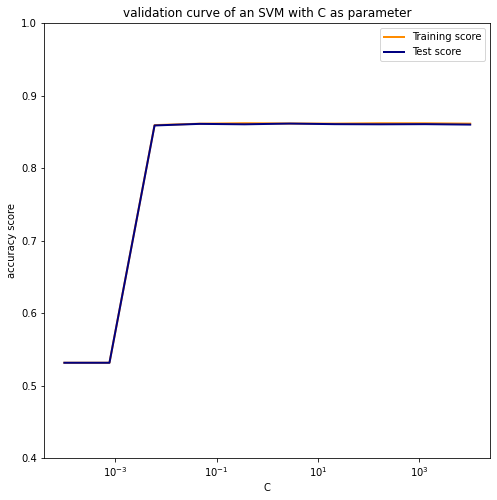

In [19]:
param_range = np.logspace(-4, 4, 10)
train_scores, test_scores = validation_curve(
    SVC(gamma=1), X, y, param_name="C", param_range=param_range,
    scoring="accuracy", n_jobs=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("validation curve of an SVM with C as parameter")
plt.xlabel("C")
plt.ylabel("accuracy score")
plt.ylim(0.4, 1.0)
line_width = 2
plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=line_width)
plt.semilogx(param_range, test_scores_mean, label="Test score", color="navy", lw=line_width)
plt.legend(loc="best")
plt.show()

As we see with a value of C = 1 we are not underfitting or overfitting (both train and test scores are high).

### learning curves

Finally, another interesting question is "Will more data still improve the accuracy of my trained model?".  

We can answer this question by varying the size of the data set and see what the effect is on the accuracy scores of the train and test sets.

A convenient method to perform this kind of analysis is learning_curve() of sklearn.  
(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve)  